In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from tabulate import tabulate
from tqdm import tqdm

In [6]:
df = pd.read_json('/../../Preliminary_Data_Files/hits_collation.json')
print(df.shape)

ValueError: Expected object or value

In [3]:
######### Looking at the number of hits in each field of view #########
file_path = df["file_path"]
unique_file_path = np.unique(file_path) #the array of unique fields of view
print(len(unique_file_path))
print(len(np.unique(df["tstart"])))

22826
1721


NEVER RUN THIS PART EVER AGAIN!!!!

In [ ]:
######### Start by making a blank data frame that we can append information to #########
df1 = pd.DataFrame({"file_path":[],
                    "hit_file_enumeration":[],
                    "signal_frequency":[],
                    "signal_index":[],
                    "signal_driftSteps":[],
                    "signal_driftRate":[],
                    "signal_snr":[],
                    "signal_coarseChannel":[],
                    "signal_numTimesteps":[],
                    "signal_power":[],
                    "signal_incoherentPower":[],
                    "sourceName":[],
                    "fch1":[],
                    "foff":[],
                    "tstart":[],
                    "tsamp":[],
                    "ra":[],
                    "dec":[],
                    "telescopeId":[],
                    "numTimesteps":[],
                    "numChannels":[],
                    "coarseChannel":[],
                    "startChannel":[],
                    "beam":[]})

######## This for loop should go through and add all of the tables that have the beam anomalies to a new table #########
for i in tqdm(range(len(unique_file_path))):
#for i in range(1):
    fov_subset = df.loc[df['file_path'] == unique_file_path[i]] #select each subset
    fov_subset = fov_subset.sort_values(by = ["signal_frequency"])
    
    freq = fov_subset["signal_frequency"] #define just the column for frequencies
    power = fov_subset["signal_power"] #define just the column for power
    unique_freq = np.unique(freq) #find the array of unique frequencies

    #Here we want to find how many hits each frequency had between the 5 coherent beams and the one incoherent beam
    hits_per_freq = []
    for k in range(len(unique_freq)):
        hits_per_freq.append(np.count_nonzero(freq == unique_freq[k]))
    #print(hits_per_freq)

    #Each frequency should have a maximum of 6 hits if it is widespread RFI
    indices = np.where(np.array(hits_per_freq) != 6)
    values_less_than_6 = np.array(unique_freq)[indices]
    
    new_indices = np.concatenate(np.where(np.isin(np.array(freq), values_less_than_6) == True))
    
    appending_rows = fov_subset.iloc[new_indices]
    
    df1 = df1.append(appending_rows, ignore_index = True)
display(df1)

 12%|█▏        | 2841/22826 [18:30<2:02:37,  2.72it/s]

In [13]:
with open('subset_3.pkl', 'wb') as f:  # open a text file
    pickle.dump(df1, f) # serialize the list
f.close()

,file_path,hit_file_enumeration,signal_frequency,signal_index,signal_driftSteps,signal_driftRate,signal_snr,signal_coarseChannel,signal_numTimesteps,signal_power,...,tstart,tsamp,ra,dec,telescopeId,numTimesteps,numChannels,coarseChannel,startChannel,beam
593,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,160.0,2477.289040,37885.0,0.0,0.000000,8.695064,0.0,64.0,2.476007e+11,...,60006.143459,0.131072,3.732493,11.5123,0.0,64.0,79.0,0.0,37845.0,2.0
594,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,123.0,2477.289040,37885.0,0.0,0.000000,8.349617,0.0,64.0,2.411613e+11,...,60006.143459,0.131072,3.733933,11.4104,0.0,64.0,79.0,0.0,37845.0,1.0
595,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,24.0,2477.289040,37885.0,0.0,0.000000,8.401473,0.0,64.0,2.420067e+11,...,60006.143459,0.131072,3.722847,11.4425,0.0,64.0,79.0,0.0,37845.0,4.0
596,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,41.0,2477.289040,37885.0,0.0,0.000000,8.636719,0.0,64.0,2.466526e+11,...,60006.143459,0.131072,3.723367,11.4237,0.0,64.0,79.0,0.0,37845.0,3.0
597,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,161.0,2477.302750,39682.0,0.0,0.000000,9.443453,0.0,64.0,2.613663e+11,...,60006.143459,0.131072,3.732493,11.5123,0.0,64.0,79.0,0.0,39642.0,2.0
598,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,204.0,2477.302750,39682.0,1.0,0.923931,8.460861,0.0,64.0,2.432057e+11,...,60006.143459,0.131072,3.733933,11.4104,0.0,64.0,80.0,0.0,39642.0,1.0
599,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,57.0,2477.302750,39682.0,0.0,0.000000,8.941877,0.0,64.0,2.500929e+11,...,60006.143459,0.131072,3.331641,11.5200,0.0,64.0,79.0,0.0,39642.0,5.0
600,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,25.0,2477.302750,39682.0,0.0,0.000000,8.358024,0.0,64.0,2.412086e+11,...,60006.143459,0.131072,3.722847,11.4425,0.0,64.0,79.0,0.0,39642.0,4.0
601,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,128.0,2477.302750,39682.0,0.0,0.000000,9.925593,0.0,64.0,2.702764e+11,...,60006.143459,0.131072,3.725473,11.5307,0.0,64.0,79.0,0.0,39642.0,0.0
602,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,143.0,2477.346893,45468.0,0.0,0.000000,8.731818,0.0,64.0,2.483140e+11,...,60006.143459,0.131072,3.725473,11.5307,0.0,64.0,79.0,0.0,45428.0,0.0


Ok never run the above function again!

In [108]:
start_time = []
#for i in range(len(unique_file_path)):
for i in range(100):
    fov_subset = df.loc[df['file_path'] == unique_file_path[i]] #select each subset
    
    freq = fov_subset["signal_frequency"] #define just the column for frequencies
    power = fov_subset["signal_power"] #define just the column for power
    unique_freq = np.unique(freq) #find the array of unique frequencies

    #Here we want to find how many hits each frequency had between the 5 coherent beams and the one incoherent beam
    hits_per_freq = []
    for k in range(len(unique_freq)):
        hits_per_freq.append(np.count_nonzero(freq == unique_freq[k]))

    #Each frequency should have a maximum of 6 hits if it is widespread RFI
    indices = np.where(np.array(hits_per_freq) < 6)
    #print(indices)
    values_less_than_6 = np.array(unique_freq)[indices]
    #print(values_less_than_6)
    #print(np.array(hits_per_freq)[indices])
    
    new_indices = np.where(np.isin(np.array(fov_subset.sort_values(by = ["signal_frequency", "beam"])["signal_frequency"]), 
                      values_less_than_6) == True)
    
    print(new_indices)
    
    time = np.array(fov_subset.sort_values(by = ["signal_frequency", "beam"])["tstart"])[new_indices]
    start_time.append(time)
    
    print(i, ' out of ', len(unique_file_path))
start_time  = np.concatenate(start_time)
print(len(np.unique(start_time)))

(array([ 84,  85,  86,  87,  94,  95, 144, 145, 146, 147, 148, 281, 282,
       283, 284, 291, 292, 341, 342, 343, 344, 345, 412, 413, 420, 421,
       422, 423, 436, 437, 438, 439, 440, 453, 454, 455, 456, 457, 458,
       459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469]),)
0  out of  22826
(array([ 96, 109, 230, 237, 238, 251, 252, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 272, 273, 298, 299, 300, 301,
       302, 321, 322, 323, 324, 325, 326, 327, 328]),)
1  out of  22826
(array([ 36,  37,  38,  39,  40, 101, 102, 103, 152, 153, 154, 155, 156,
       241, 242, 243, 244, 245, 306, 307, 308, 357, 358, 359, 360, 361,
       410, 411, 418, 419, 426, 427, 434, 435, 436, 437, 438, 445, 446,
       447, 448, 449, 480, 481, 494, 495, 496, 497, 498, 499, 500, 501,
       502]),)
2  out of  22826
(array([ 90,  91,  92,  93,  94,  95,  96,  97, 302, 303, 304, 305, 306,
       307, 308, 309, 430, 431, 432, 463, 464, 471, 472, 473, 474, 475,
       476, 477, 4

(array([ 54,  55,  56,  57,  58,  59,  90, 223, 224, 225, 232, 233, 234,
       235, 236, 237, 340, 341, 342, 343, 344, 345, 376, 509, 510, 511,
       518, 519, 520, 521, 522, 523, 572, 573, 574, 575, 582, 583, 584,
       585, 586, 587, 588, 595, 596, 597, 598, 605, 606, 607, 608, 609,
       610, 611]),)
19  out of  22826
(array([ 90, 223, 224, 225, 226, 227, 234, 235, 236, 237, 238, 239, 240,
       241, 290, 291, 292, 293, 294, 301, 350, 351, 352, 353, 354, 355,
       374, 375, 376, 377, 378, 379, 482, 525, 526, 527, 528, 529]),)
20  out of  22826
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
       

(array([ 24,  25,  26,  27,  28,  29, 222, 223, 224, 225, 226, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 363, 364, 365, 366, 367, 368, 381,
       382, 383, 384, 385, 386, 393, 430, 431, 432, 433, 434, 435]),)
42  out of  22826
(array([ 66,  67,  68,  69,  70,  71, 228, 229, 230, 231, 232, 377, 378,
       379, 380, 381, 382, 539, 540, 541, 542, 543, 634, 635, 636, 637,
       638, 639, 640, 641, 642, 643, 644, 657, 658, 659, 660, 661, 662]),)
43  out of  22826
(array([312, 313, 314, 315, 316, 317, 318, 331, 332, 333, 334, 335, 336,
       337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 360, 373,
       374, 399, 400, 401]),)
44  out of  22826
(array([108, 109, 110, 111, 112, 113, 420, 421, 422, 423, 424, 425, 624,
       631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 647, 648, 649,
       650, 651, 652, 653, 654, 655]),)
45  out

(array([150, 151, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 211, 212, 213, 214, 215, 252, 253,
       254, 255, 256, 257, 282, 301, 302, 303, 304, 305, 306]),)
74  out of  22826
(array([150, 151, 152, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214]),)
75  out of  22826
(array([ 96, 151, 152, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208]),)
76  out of  22826
(array([  6,   7,   8,   9,  10,  95,  96,  97,  98, 153, 154, 155, 186,
       187, 188, 189, 190, 275, 276, 277, 278, 333, 334, 335, 372, 373,
       374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386,
       387, 388, 389, 390, 391, 392]),)
77  out of  22826
(array([ 96,  97,  98,  99, 100, 101, 102, 151, 272, 273, 274, 275, 276,
       277, 278, 327, 358, 359, 360, 361, 362, 363, 364, 365]),)
78  out of  22826
(a

Now open up that .pickle file and make sure that it is everything that we were trying to get

Printing out some things just to see the shape of the data we are working with. Does not need to be run each time because nothing gets defined.

Now just looking at a sample plot to see what the frequencies of the hits are. Also does not need to be run each time.

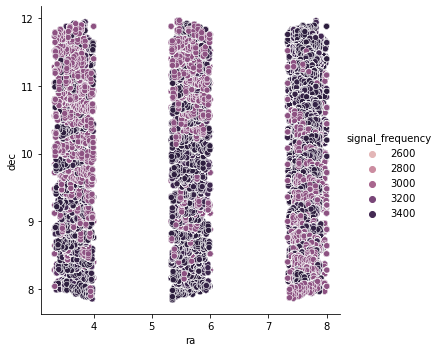

In [17]:
g = sns.relplot(data=df1, x=df1.iloc[:]["ra"], y=df1.iloc[:]["dec"], hue=df1.iloc[:]["signal_frequency"])

Define a few variables. Should be run each time because a lot of things reference this one.

In [8]:
source_name = np.unique(subset_2["Source Name"]) #The names of the 7732 unique sources (plus the incoherent beam)
ra = subset_2["Right Ascension"]
dec = subset_2["Declination"]

print(len(source_name))

7733


Open the pickle file that has the incorrect information for the number of fields per unique source. Could honestly be removed because that file is not correct.

In [13]:
with open('unique_fields_1.pkl', 'wb') as f:  # open a text file
    pickle.dump(number_of_fovs, f) # serialize the list
f.close()

Arrange the information in the subset pickle file based on a few characteristics. We will filter based on this information. It could be a good idea to toss this into a pickle file because it tends to take a while to run.

In [17]:
info = pd.DataFrame({'Source': np.array(subset_1.sort_values(by = ["Source Name", "File Path"])["Source Name"]), 
        'File Path': np.array(subset_1.sort_values(by = ["Source Name", "File Path"])["File Path"]), 
        'Right Ascension': np.array(subset_1.sort_values(by = ["Source Name", "File Path"])["Right Ascension"]), 
       'Declination': np.array(subset_1.sort_values(by = ["Source Name", "File Path"])["Declination"])})

display(info)

,Source,File Path,Right Ascension,Declination
0,10061016726276864,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,3.491587,7.99577
1,10061016726276864,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,3.491587,7.99577
2,10061016726276864,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,3.491587,7.99577
3,10061016726276864,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,3.491587,7.99577
4,10061016726276864,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,3.491587,7.99577
...,...,...,...,...
805059,Incoherent,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,4.001692,11.40000
805060,Incoherent,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,4.001692,11.40000
805061,Incoherent,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,4.001692,11.40000
805062,Incoherent,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,4.001692,11.40000


This sets up the indexing and figuring out how many unique fields of view there are per source. It takes a long time to run and because the information is already calculated and being stored in a pickle file, should not be run again.

In [18]:
source_name = np.unique(subset_1["Source Name"])
source = subset_1["Source Name"]

hits_per_source = []
for i in range(len(source_name)):
    hits_per_source.append(np.count_nonzero(source == source_name[i]))

In [19]:
print(len(source_name), len(source))

print(hits_per_source[0])

7733 805064
53


We might need the indices again and this one doesn't take long to run, so it should be run every time.

In [20]:
indices = [0]
for i in range(len(hits_per_source)-1):
    indices.append(indices[i] + hits_per_source[i])
    
print(len(indices))

7733


Do not run this again. All of the information has already been stored in a pickle file, so you just need to open the file.

In [21]:
hits_info = pd.DataFrame({'Source': np.array(subset_1.sort_values(by = ["Source Name", "File Path"])["Source Name"])[indices], 
        'Number of Hits': np.array(hits_per_source), 
        'Right Ascension': np.array(subset_1.sort_values(by = ["Source Name", "File Path"])["Right Ascension"])[indices], 
       'Declination': np.array(subset_1.sort_values(by = ["Source Name", "File Path"])["Declination"])[indices]})

display(hits_info)

#with open('hits_per_source.pkl', 'wb') as f:  # open a text file
    #pickle.dump(hits_info, f) # serialize the list
#f.close()

,Source,Number of Hits,Right Ascension,Declination
0,10061016726276864,53,3.491587,7.99577
1,10106096702975616,51,3.465247,8.03126
2,10109429597635840,44,3.486560,8.07729
3,10109841914495744,53,3.487867,8.09497
4,10116782581611264,55,3.456280,8.00716
...,...,...,...,...
7728,37476514532036352,39,3.630000,11.87140
7729,37509018844558976,464,3.590373,11.82340
7730,37509396801674496,465,3.595180,11.86220
7731,37510010980469120,464,3.591460,11.87010


Be sure to open this each time. The naming conventions are the the same for below so there should be no issues.

In [13]:
with open('hits_per_source.pkl', 'rb') as f:
    hits_info = pickle.load(f)

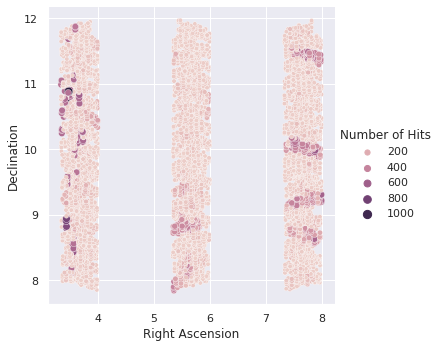

In [14]:
sns.set_theme()
sns.relplot(data=hits_info[0:-1], x=hits_info["Right Ascension"][0:-1], y=hits_info["Declination"][0:-1], 
            hue=hits_info["Number of Hits"][0:-1], size = hits_info["Number of Hits"][0:-1])

In [22]:
from tqdm.notebook import tqdm
from time import sleep

def countFreq(arr, n):
    
    # Mark all array elements as not visited
    visited = [False for i in range(n)]
    fp_list = []
    # Traverse through array elements and count frequencies
    for i in range(n):
         
        # Skip this element if already processed
        if (visited[i] == True):
            continue
 
        # Count frequency
        count = 1
        for j in range(i + 1, n, 1):
            if (arr[i] == arr[j]):
                visited[j] = True
                count += 1
         
        #print(count)
        fp_list.append(count)
    return len(fp_list)
        
#Driver Code
arr = np.array(info["File Path"][693038:-1])
n = len(arr)
countFreq(arr, n)
#countFreq(np.array(info["File Path"]), len(np.array(info["File Path"])))

  0%|          | 0/100 [00:00<?, ?it/s]

18194

In [23]:
fovs_per_source = []
for i in range(len(indices)-1):
    arr = np.array(info["File Path"][indices[i]:indices[i+1]])
    n = len(arr)
    fovs_per_source.append(countFreq(arr, n))
#print(len(fovs_per_source))
fovs_per_source.append(18194)

for i in tqdm(range(100)):
    sleep(3)
#print(indices[-1])

  0%|          | 0/100 [00:00<?, ?it/s]

In [24]:
fovs_info = pd.DataFrame({'Source': np.array(subset_1.sort_values(by = ["Source Name", "File Path"])["Source Name"])[indices], 
        'Number of FOVs': np.array(fovs_per_source), 
        'Right Ascension': np.array(subset_1.sort_values(by = ["Source Name", "File Path"])["Right Ascension"])[indices], 
       'Declination': np.array(subset_1.sort_values(by = ["Source Name", "File Path"])["Declination"])[indices]})

display(fovs_info)

with open('fovs_per_source.pkl', 'wb') as f:  # open a text file
    pickle.dump(fovs_info, f) # serialize the list
f.close()

,Source,Number of FOVs,Right Ascension,Declination
0,10061016726276864,12,3.491587,7.99577
1,10106096702975616,9,3.465247,8.03126
2,10109429597635840,9,3.486560,8.07729
3,10109841914495744,12,3.487867,8.09497
4,10116782581611264,11,3.456280,8.00716
...,...,...,...,...
7728,37476514532036352,10,3.630000,11.87140
7729,37509018844558976,13,3.590373,11.82340
7730,37509396801674496,13,3.595180,11.86220
7731,37510010980469120,13,3.591460,11.87010


In [29]:
display(fovs_info[0:50])

,Source,Number of FOVs,Right Ascension,Declination
0,10061016726276864,12,3.491587,7.99577
1,10106096702975616,9,3.465247,8.03126
2,10109429597635840,9,3.486560,8.07729
3,10109841914495744,12,3.487867,8.09497
4,10116782581611264,11,3.456280,8.00716
5,10119050324339328,10,3.461113,8.09765
6,10119114748465280,9,3.459260,8.08325
7,10123242212420736,8,3.455247,8.13690
8,10130217239302528,22,3.460060,8.24895
9,10132416262554752,24,3.465840,8.31302


In [25]:
with open('fovs_per_source.pkl', 'rb') as f:
    fovs_info = pickle.load(f)

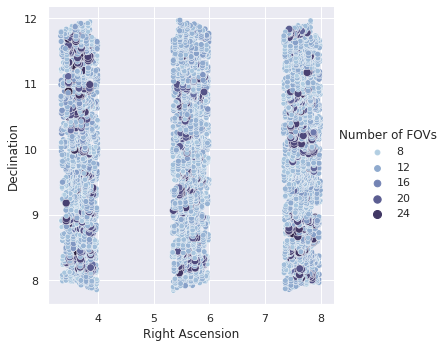

In [27]:
sns.set_theme()
sns.relplot(data=fovs_info[0:-1], x=fovs_info["Right Ascension"][0:-1], y=fovs_info["Declination"][0:-1], 
            hue=fovs_info["Number of FOVs"][0:-1], size = fovs_info["Number of FOVs"][0:-1], palette = "ch:s=.25,rot=-.25")

#plt.savefig('FOVs_per_Source.png', bbox_inches='tight', transparent = True)

In [28]:
print(np.max(fovs_info["Number of FOVs"][0:-1]))
print(np.min(fovs_info["Number of FOVs"][0:-1]))

27
6


Ok now we need to start looking through each of the fields of view to see where there might be similar frequencies and characteristics. So let's start by trying to just pull all of the data for one source with a lot of fields of view. By looking at the table above, I'm going to start by just choosing a source.

In [67]:
source_1 = subset_1.loc[subset_1["Source Name"] == "10132416262554752"]

display(source_1[0:20])

print(np.array(source_1["Signal to Noise"]))

print(len(subset_1["Signal Index"]))

,Source Name,Beam Number,Frequency,Right Ascension,Declination,Power,Incoherent Power,Drift Rate,Signal to Noise,Coarse Channel,File Path,Enumeration,Signal Index
144040,10132416262554752,3.0,2477.146385,3.46584,8.31302,2.587597e+11,2.438061e+11,0.000000,9.235197,0.0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,33.0,19187.0
144045,10132416262554752,3.0,2477.288490,3.46584,8.31302,2.969534e+11,2.782598e+11,0.000000,11.309798,0.0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,41.0,37813.0
144050,10132416262554752,3.0,2477.302818,3.46584,8.31302,2.939655e+11,2.683056e+11,0.000000,11.147504,0.0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,29.0,39691.0
144056,10132416262554752,3.0,2477.420609,3.46584,8.31302,2.487069e+11,2.574337e+11,0.000000,8.689149,0.0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,53.0,55130.0
144060,10132416262554752,3.0,2477.767899,3.46584,8.31302,4.464331e+11,4.323818e+11,0.000000,19.429218,0.0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,3.0,100650.0
144067,10132416262554752,3.0,2486.477196,3.46584,8.31302,2.569245e+11,1.718338e+11,0.000000,8.015408,9.0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,246.0,62547.0
144071,10132416262554752,3.0,2486.504448,3.46584,8.31302,2.753324e+11,3.206062e+11,0.000000,8.931943,9.0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,245.0,66119.0
144083,10132416262554752,3.0,2487.361572,3.46584,8.31302,2.887793e+11,1.878658e+11,-49.892281,9.079951,10.0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,257.0,47392.0
144086,10132416262554752,3.0,2487.363953,3.46584,8.31302,3.117434e+11,1.711968e+11,-44.348694,10.178812,10.0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,258.0,47704.0
144097,10132416262554752,3.0,2488.226311,3.46584,8.31302,2.500358e+11,1.321543e+11,-14.782898,8.190058,11.0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,275.0,29663.0


[  9.23519707  11.30979824  11.14750385   8.6891489   19.42921829
   8.01540756   8.93194294   9.07995129  10.17881203   8.19005775
   9.38490868   9.02647972   8.20213985  16.48395157   9.21182346
   9.09727287  52.95629501   8.00231647   8.50220013  14.8206377
   9.09432983   8.61290359  10.86448956  18.14727592   8.50591755
  13.37237644   9.23866177  13.37237644   9.23866177  14.3671751
   9.62209034   8.61204433   8.82374287   8.17556858  17.74481201
  22.22967529   9.68965626  24.59547806  10.78007603  10.30587673
  12.89569759   8.68304634   8.89271355   8.75791836   9.93134975
   8.46793747 165.58285522   8.19937897   8.18932056  23.42790985
   8.05054474   8.18932056  23.42790985   8.05054474   8.7157402
   8.06079006   8.48620796   9.34682941   8.07033062   9.15890312
  31.68616867   8.73774242   8.73774242   8.24117661   8.29085159
   8.53616905  18.33171082   8.62902832  15.76600075  26.63647461
  10.39121532  13.18400669  15.8005476   37.3708725   10.373456
   8.97149658  

In [59]:
print(len(np.unique(source_1["Frequency"])))
print(len(source_1["Frequency"]))
#print(np.array(source_1["Frequency"]))

def countFreq(arr, n):
    
    # Mark all array elements as not visited
    visited = [False for i in range(n)]
    # Traverse through array elements and count frequencies
    for i in range(n):
         
        # Skip this element if already processed
        if (visited[i] == True):
            continue
 
        # Count frequency
        count = 1
        for j in range(i + 1, n, 1):
            if (arr[i] == arr[j]):
                visited[j] = True
                count += 1
         
        print(arr[i], count)
        #fp_list.append(count)
        
#Driver Code
arr = np.array(source_1["Frequency"])
n = len(arr)
countFreq(arr, n)

101
107
2477.146385192871 1
2477.28849029541 1
2477.30281829834 1
2477.420608520508 1
2477.7678985595703 2
2486.477195739746 1
2486.5044479370117 1
2487.361572265625 1
2487.3639526367188 1
2488.2263107299805 1
2488.8242721557617 1
2491.761085510254 1
2502.645248413086 1
2505.4609451293945 1
2508.7342529296875 2
2508.8224563598633 1
2541.301643371582 1
2541.7997512817383 1
2556.7117080688477 1
2557.1298904418945 1
2557.308708190918 1
2557.355293273926 1
2557.4249114990234 2
2572.7678985595703 2
2572.961898803711 1
2605.7678985595703 1
2605.947540283203 1
2606.7678985595703 1
2606.947540283203 1
2622.209114074707 1
2622.42488861084 1
2669.0418090820312 1
2700.0415115356445 1
2700.699951171875 1
2700.702522277832 1
2733.2756423950195 1
2733.3941650390625 1
2733.4248962402344 1
2741.499153137207 1
2741.5080337524414 1
2742.1508865356445 1
2742.1597595214844 1
2749.355293273926 1
2764.259696960449 1
2764.711700439453 2
2764.9859161376953 1
2797.1299057006836 1
2827.512855529785 1
2861.12989

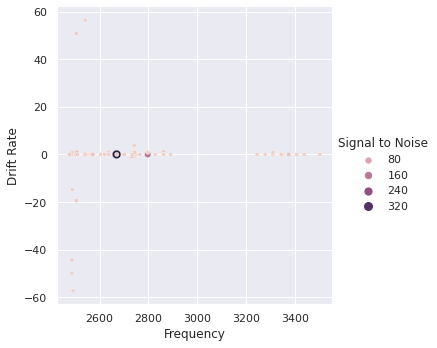

In [35]:
sns.set_theme()
sns.relplot(data=source_1, x=source_1["Frequency"], y=source_1["Drift Rate"], 
            hue=source_1["Signal to Noise"], size = source_1["Signal to Noise"])